Upload the Datasets.

In [1]:


from google.colab import files
uploaded = files.upload()


Saving augmented_psychosis_risk_classification_10000 (1).csv to augmented_psychosis_risk_classification_10000 (1).csv


In [2]:

import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['augmented_psychosis_risk_classification_10000 (1).csv']))


In [4]:
#To do the data inspection.
#To display the first few rows of the datasets.
print(df2.head())
#Check for any missing values.
print("Missing values")
print(df2.isnull().sum())
#get the summary of the dataset.
print("Summary")
print(df2.info())



   Interview_ID                                         Transcript  \
0           101  Interviewer: So Cheng Wei, do you remember how...   
1           102  Interviewer: So Cheng Wei, do you remember how...   
2           103  Interviewer: So Cheng Wei, do you remember how...   
3           104  Interviewer: So Cheng Wei, do you remember how...   
4           105  Interviewer: So Cheng Wei, do you remember how...   

    Risk_Level Emotion_Tone                               Keywords  
0    High Risk     Paranoid  unknown, depression, anxious, working  
1  Medium Risk      Worried                 unknown, whispers, two  
2    High Risk     Hopeless   isolated, taken, anxious, depression  
3    High Risk     Hopeless                        taken, auditory  
4  Medium Risk    Concerned    working, local, anxious, depression  
Missing values
Interview_ID    0
Transcript      0
Risk_Level      0
Emotion_Tone    0
Keywords        0
dtype: int64
Summary
<class 'pandas.core.frame.DataFrame'>
R

In [5]:
#Data Cleaning process.
#Removing the noises and Special characters.
import re
def clean_text(text):
  #Remove the special char
  text = re.sub(r'[^A-Za-z\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text
df2['cleaned_Transcript'] = df2['Transcript'].apply(clean_text)

In [7]:
#b.Handling the missing values.
df2.dropna(subset=['cleaned_Transcript'],inplace=True)
#then , we will fill the missing values in coloumns with a placeholder.
df2['Risk_Level'].fillna('Not-known', inplace=True)
df2['Emotion_Tone'].fillna('Not-known',inplace=True)
df2['Keywords'].fillna('none',inplace=True)


In [8]:
#Now after data cleaning we will move forward to Text preprocessing.
#lets do Tokenization.
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df2['Tokens']=df2['cleaned_Transcript'].apply(word_tokenize)
print(df2.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   Interview_ID                                         Transcript  \
0           101  Interviewer: So Cheng Wei, do you remember how...   
1           102  Interviewer: So Cheng Wei, do you remember how...   
2           103  Interviewer: So Cheng Wei, do you remember how...   
3           104  Interviewer: So Cheng Wei, do you remember how...   
4           105  Interviewer: So Cheng Wei, do you remember how...   

    Risk_Level Emotion_Tone                               Keywords  \
0    High Risk     Paranoid  unknown, depression, anxious, working   
1  Medium Risk      Worried                 unknown, whispers, two   
2    High Risk     Hopeless   isolated, taken, anxious, depression   
3    High Risk     Hopeless                        taken, auditory   
4  Medium Risk    Concerned    working, local, anxious, depression   

                                  cleaned_Transcript  \
0  Interviewer So Cheng Wei do you remember how m...   
1  Interviewer So Cheng Wei do you remember ho

In [9]:
# We will remove the Stop words (The common stop words that do not add any significant meaning to the text.)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df2['Tokens']=df2['Tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#lemmatization in NLTK  .
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')#downloads WordNet, a large lexical database of English, used for tasks like finding synonyms and antonyms of words.
nltk.download('averaged_perceptron_tagger')#downloads a pre-trained part-of-speech tagger, which is used to label words with their grammatical categories (like noun, verb, adjective, etc.).
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
df2['Tokens'] = df2['Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [17]:
df2.Tokens[54]

['Interviewer',
 'So',
 'Cheng',
 'Wei',
 'remember',
 'many',
 'year',
 'ago',
 'get',
 'sick',
 'Cheng',
 'Wei',
 'Uh',
 'last',
 'February',
 'Interviewer',
 'Last',
 'February',
 'So',
 'February',
 'last',
 'year',
 'youve',
 'continuously',
 'see',
 'doctor',
 'NTU',
 'Hospital',
 'Cheng',
 'Wei',
 'Yes',
 'Interviewer',
 'How',
 'doctor',
 'tell',
 'sick',
 'time',
 'Cheng',
 'Wei',
 'The',
 'doctor',
 'say',
 'I',
 'schizophrenia',
 'Interviewer',
 'Schizophrenia',
 'Cheng',
 'Wei',
 'Yes',
 'Interviewer',
 'What',
 'feel',
 'Cheng',
 'Wei',
 'It',
 'felt',
 'like',
 'hallucination',
 'I',
 'would',
 'get',
 'nervous',
 'I',
 'saw',
 'people',
 'mainly',
 'hallucination',
 'touch',
 'hallucination',
 'Interviewer',
 'Touch',
 'hallucination',
 'Cheng',
 'Wei',
 'Yes',
 'like',
 'feel',
 'something',
 'crawl',
 'face',
 'specific',
 'area',
 'Interviewer',
 'Specific',
 'area',
 'Cheng',
 'Wei',
 'Yes',
 'Interviewer',
 'Which',
 'area',
 'Cheng',
 'Wei',
 'Uh',
 'convenient',
 

In [18]:
df2['processed_Transcripts']=df2['Tokens'].apply(lambda tokens: ' '.join(tokens))

In [58]:
df2['processed_Transcripts'][54]

'Interviewer So Cheng Wei remember many year ago get sick Cheng Wei Uh last February Interviewer Last February So February last year youve continuously see doctor NTU Hospital Cheng Wei Yes Interviewer How doctor tell sick time Cheng Wei The doctor say I schizophrenia Interviewer Schizophrenia Cheng Wei Yes Interviewer What feel Cheng Wei It felt like hallucination I would get nervous I saw people mainly hallucination touch hallucination Interviewer Touch hallucination Cheng Wei Yes like feel something crawl face specific area Interviewer Specific area Cheng Wei Yes Interviewer Which area Cheng Wei Uh convenient talk light laugh Interviewer Okay thats fine Interviewer Do remember first start feel symptom touch hallucination nervousness around people last February Cheng Wei I forgot Interviewer So last February old Cheng Wei Twentytwo Interviewer Twentytwo year old Cheng Wei Yes Interviewer When first time felt symptom Cheng Wei I first felt symptom Interviewer Why go see doctor Do reme

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df2['processed_Transcripts'])

# Convert TF-IDF features into a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [62]:

!pip install tensorflow sklearn nltk

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [63]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [64]:
# Parameters
max_words = 5000  # Maximum number of words to consider in the vocabulary
max_len = 100     # Maximum length of sequences (number of words)

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df2['processed_Transcripts'])  # Fit on the processed text data

# Convert text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(df2['processed_Transcripts'])

# Pad sequences to ensure they all have the same length
X_padded = pad_sequences(X_sequences, maxlen=max_len)


In [66]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df2['Risk_Level'])


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Parameters for the model
max_words = 8000
max_len = 120
embedding_dim = 128
lstm_units = 128
input_dim = 5000
# Each word will be represented by a 128-dimensional vector
input_length = 100
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units, return_sequences=False))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(3, activation='softmax'))  # Adjust output layer based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - accuracy: 0.4916 - loss: 0.9107 - val_accuracy: 0.5720 - val_loss: 0.8131
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 296ms/step - accuracy: 0.5617 - loss: 0.8092 - val_accuracy: 0.5720 - val_loss: 0.8156
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.5684 - loss: 0.8044 - val_accuracy: 0.5720 - val_loss: 0.8164
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 329ms/step - accuracy: 0.5646 - loss: 0.8041 - val_accuracy: 0.5720 - val_loss: 0.8159
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 85s 353ms/step - accuracy: 0.5605 - loss: 0.7991 - val_accuracy: 0.5720 - val_loss: 0.8105
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 315ms/step - accuracy: 0.5631 - loss: 0.8034 - val_accuracy: 0.5720 - val_loss: 0.8100
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 284ms/step - accuracy: 0.5610 - loss: 0.8002 - val_accuracy: 0.5720 - val_loss: 0.8095
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - accuracy: 0.5691 - loss: 0.7858 - val

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
model = Sequential()
max_words = 8000
max_len = 120
embedding_dim = 128
lstm_units = 128
input_dim = 5000
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(256, return_sequences=True))  # First LSTM layer
model.add(LSTM(128))  # Second LSTM layer
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [84]:
max_words = 8000
max_len = 120
embedding_dim = 128
lstm_units = 128
input_dim = 5000
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.4955 - loss: 0.8997 - val_accuracy: 0.5720 - val_loss: 0.8243
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 123s 986ms/step - accuracy: 0.5581 - loss: 0.8191 - val_accuracy: 0.5720 - val_loss: 0.8157
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 994ms/step - accuracy: 0.5490 - loss: 0.8129 - val_accuracy: 0.5720 - val_loss: 0.8109
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 139s 968ms/step - accuracy: 0.5698 - loss: 0.8030 - val_accuracy: 0.5720 - val_loss: 0.8152
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5541 - loss: 0.8075 - val_accuracy: 0.5720 - val_loss: 0.8126
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.5584 - loss: 0.8037 - val_accuracy: 0.5720 - val_loss: 0.8107
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5637 - loss: 0.8035 - val_accuracy: 0.5720 - val_loss: 0.8120
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.5734 - loss: 0.7997 -

In [85]:
y_pred_probs = model.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=-1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step


In [86]:
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

In [87]:
from sklearn.metrics import classification_report

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

   High Risk       0.00      0.00      0.00       841
    Low Risk       0.00      0.00      0.00       129
 Medium Risk       0.52      1.00      0.68      1030

    accuracy                           0.52      2000
   macro avg       0.17      0.33      0.23      2000
weighted avg       0.27      0.52      0.35      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
# Example new data
new_text = ["I’ve been feeling pretty good."]
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import numpy as np

# Load the trained model
model = load_model('lstm_text_classification_model.h5')

# Load the tokenizer and label encoder
tokenizer = joblib.load('tokenizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Define the preprocessing function
def preprocess_text(text, tokenizer, max_len):
    # Tokenize the text
    sequence = tokenizer.texts_to_sequences([text])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    return padded_sequence



max_len = 120  # Ensure this matches the max_len used during training
preprocessed_text = preprocess_text(new_text, tokenizer, max_len)

# Make the prediction
predicted_probabilities = model.predict(preprocessed_text)

# Get the index of the highest probability
predicted_class_index = np.argmax(predicted_probabilities, axis=1)

# Get the corresponding label
predicted_label = label_encoder.inverse_transform([predicted_class_index])

print(f"The predicted label is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
The predicted label is: ['Low Risk']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
import joblib

# Save the tokenizer
joblib.dump(tokenizer, 'tokenizer.pkl')
# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [92]:
model.save('lstm_text_classification_model.h5')

In [89]:
df2['Transcript'][2]

"Interviewer: So Cheng Wei, do you remember how many years ago you got sick?\nCheng Wei: Uh... just last February.\nInterviewer: Last February. So from February last year until now, you've been continuously seeing doctors at NTU Hospital?\nCheng Wei: Yes.\nInterviewer: How did the doctor tell you that you were sick at that time?\nCheng Wei: The doctor said I had schizophrenia.\nInterviewer: Schizophrenia.\nCheng Wei: Yes.\nInterviewer: What was your feeling about this?\nCheng Wei: It felt like... having hallucinations, and... I would get anxious when I saw people, and... mainly, it was hallucinations, touch hallucinations.\nInterviewer: Touch hallucinations?\nCheng Wei: Yes, like feeling something crawling on my face, in specific areas.\nInterviewer: Specific areas?\nCheng Wei: Yes.\nInterviewer: Which areas?\nCheng Wei: Uh... it’s not convenient to talk about (light laugh).\nInterviewer: Okay, that’s fine.\nInterviewer: Do you remember when you first started feeling these symptoms, th

63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step
              precision    recall  f1-score   support

   High Risk       0.00      0.00      0.00       841
    Low Risk       0.00      0.00      0.00       129
 Medium Risk       0.52      1.00      0.68      1030

    accuracy                           0.52      2000
   macro avg       0.17      0.33      0.23      2000
weighted avg       0.27      0.52      0.35      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


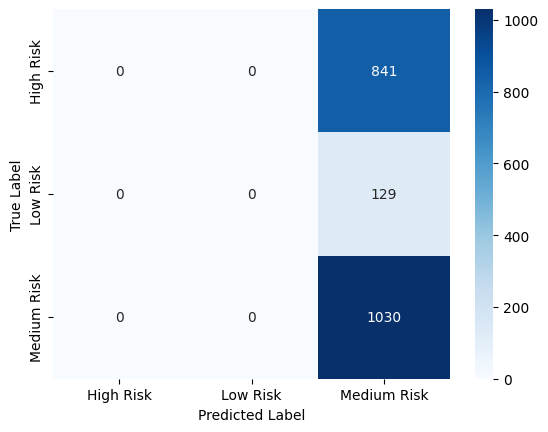

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test data
y_pred_classes = model.predict(X_test).argmax(axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
